In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from unet import UNET

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from train import load_data, train_model

train_folder = "competition_data/train"
test_folder = "competition_data/test"

train_loader, validation_loader = load_data(train_folder, split=0.8, batch_size=32)

Epoch: 0
Training loss: 0.59
Validation Loss: 0.54

Epoch: 1
Training loss: 0.56
Validation Loss: 0.53

Epoch: 2
Training loss: 0.51
Validation Loss: 0.50

Epoch: 3
Training loss: 0.45
Validation Loss: 0.42

Epoch: 4
Training loss: 0.39
Validation Loss: 0.36

Epoch: 5
Training loss: 0.36
Validation Loss: 0.34

Epoch: 6
Training loss: 0.35
Validation Loss: 0.33

Epoch: 7
Training loss: 0.35
Validation Loss: 0.34

Epoch: 8
Training loss: 0.32
Validation Loss: 0.28

Epoch: 9
Training loss: 0.31
Validation Loss: 0.27

Epoch: 10
Training loss: 0.28
Validation Loss: 0.27

Epoch: 11
Training loss: 0.27
Validation Loss: 0.25

Epoch: 12
Training loss: 0.26
Validation Loss: 0.33

Epoch: 13
Training loss: 0.26
Validation Loss: 0.26

Epoch: 14
Training loss: 0.25
Validation Loss: 0.28

Epoch: 15
Training loss: 0.24
Validation Loss: 0.22

Epoch: 16
Training loss: 0.23
Validation Loss: 0.21

Epoch: 17
Training loss: 0.21
Validation Loss: 0.22

Epoch: 18
Training loss: 0.20
Validation Loss: 0.20

Epo

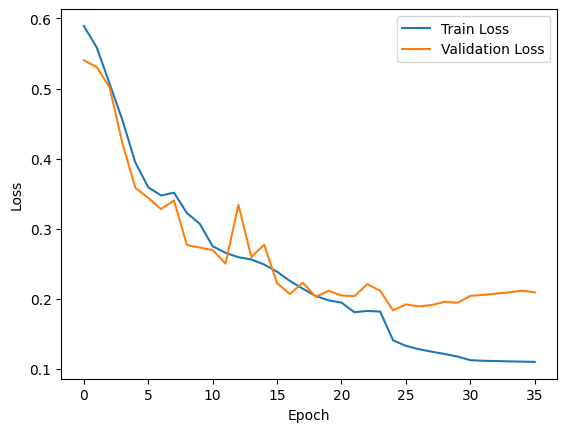

In [5]:
model = UNET().to(device)

train_loss_list, validation_loss_list = train_model(
    model, 100, train_loader, validation_loader, file_output="unet.pth"
)

plt.plot(train_loss_list, label="Train Loss")
plt.plot(validation_loss_list, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

C:\Users\paull\AppData\Local\Temp\ipykernel_7252\2657779406.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("unet.pth", map_location=dev

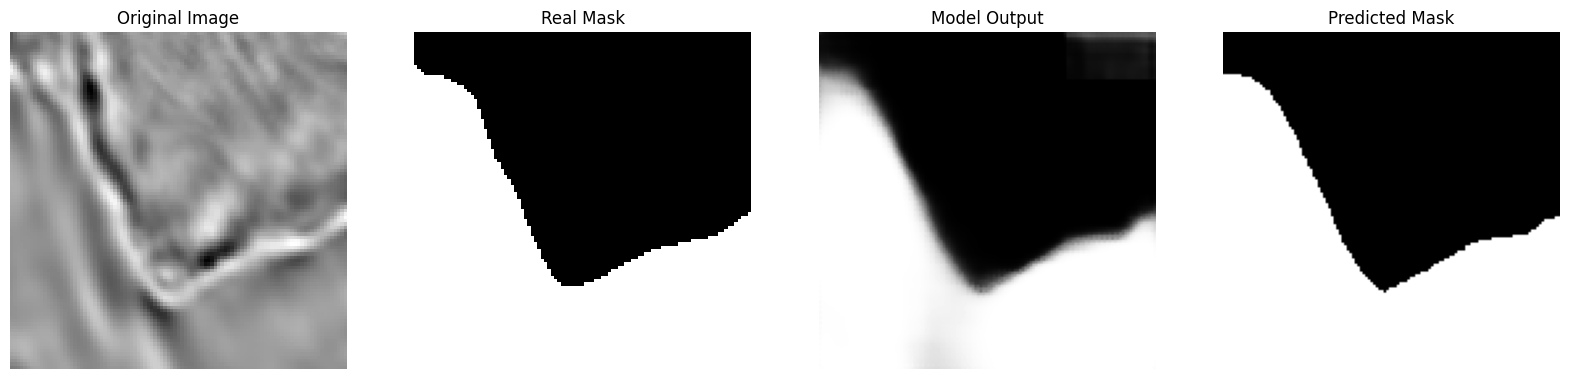

In [6]:
from test_model import test_on_image


model = UNET().to(device)
model.load_state_dict(torch.load("unet.pth", map_location=device))
model.eval()
image = "ff89e5e3cd.png"
test_on_image(image, model, threshold=0.5)


63bed65d65.png


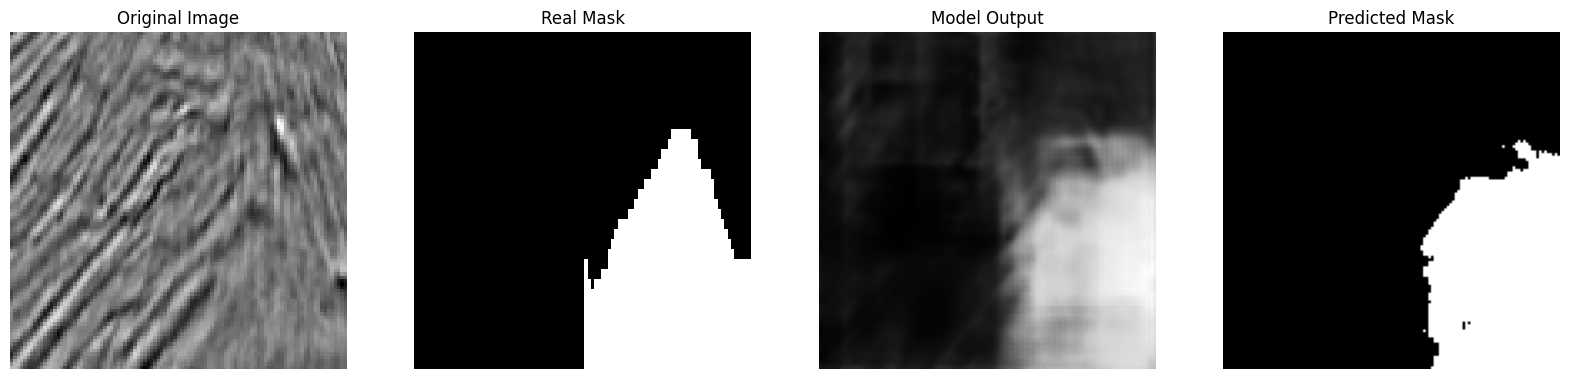

In [45]:
import os
import random

train_images_folder = os.path.join(train_folder, "images")
random_image = random.choice(os.listdir(train_images_folder))
print(random_image)
test_on_image(random_image, model, threshold=0.5)

# Questions

## Max pooling

Epoch: 0
Training loss: 0.58
Validation Loss: 0.54

Epoch: 1
Training loss: 0.56
Validation Loss: 0.53

Epoch: 2
Training loss: 0.57
Validation Loss: 0.54

Epoch: 3
Training loss: 0.56
Validation Loss: 0.54

Epoch: 4
Training loss: 0.55
Validation Loss: 0.52

Epoch: 5
Training loss: 0.54
Validation Loss: 0.50

Epoch: 6
Training loss: 0.53
Validation Loss: 0.50

Epoch: 7
Training loss: 0.52
Validation Loss: 0.49

Epoch: 8
Training loss: 0.50
Validation Loss: 0.45

Epoch: 9
Training loss: 0.55
Validation Loss: 0.52

Epoch: 10
Training loss: 0.51
Validation Loss: 0.46

Epoch: 11
Training loss: 0.46
Validation Loss: 0.43

Epoch: 12
Training loss: 0.43
Validation Loss: 0.41

Epoch: 13
Training loss: 0.42
Validation Loss: 0.39

Epoch: 14
Training loss: 0.40
Validation Loss: 0.38

Epoch: 15
Training loss: 0.39
Validation Loss: 0.38

Epoch: 16
Training loss: 0.39
Validation Loss: 0.37

Epoch: 17
Training loss: 0.39
Validation Loss: 0.39

Epoch: 18
Training loss: 0.36
Validation Loss: 0.35

Epo

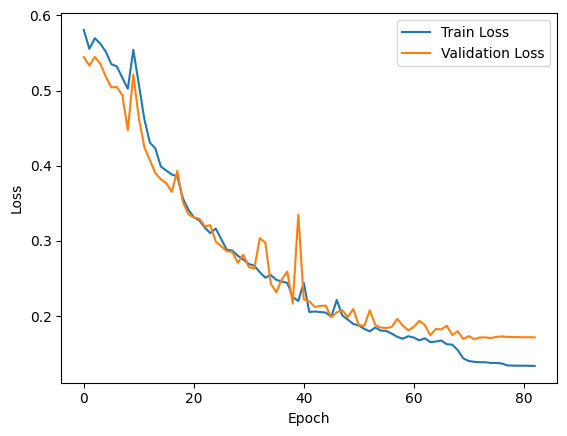

In [8]:
from unet_no_pooling import UNET_no_pooling

model2 = UNET_no_pooling().to(device)

train_loss_list, validation_loss_list = train_model(
    model2, 100, train_loader, validation_loader, file_output="unet_no_pooling.pth"
)

plt.plot(train_loss_list, label="Train Loss")
plt.plot(validation_loss_list, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

C:\Users\paull\AppData\Local\Temp\ipykernel_7252\2106120994.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load("unet_no_pooling.pth", map_

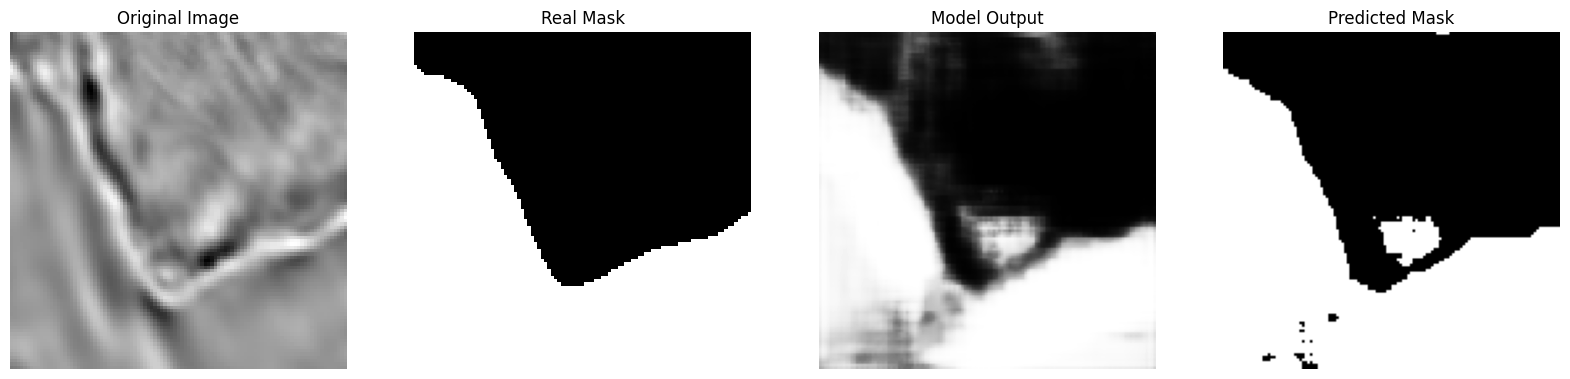

In [9]:
model2 = UNET_no_pooling().to(device)
model2.load_state_dict(torch.load("unet_no_pooling.pth", map_location=device))
model2.eval()
image = "ff89e5e3cd.png"
test_on_image(image, model2, threshold=0.5)


Max pooling selects the maximum value from a local region, which can discard potentially useful spatial details. Convolution learns the down-sampling process, potentially capturing more relevant features and reducing information loss. 
However, we increase the number of parameters of the models, which increase the model ability to learn, but also it's complexity, so the computationnal cost (training and predicting) and the chance of overfitting.

74d53a0d53.png


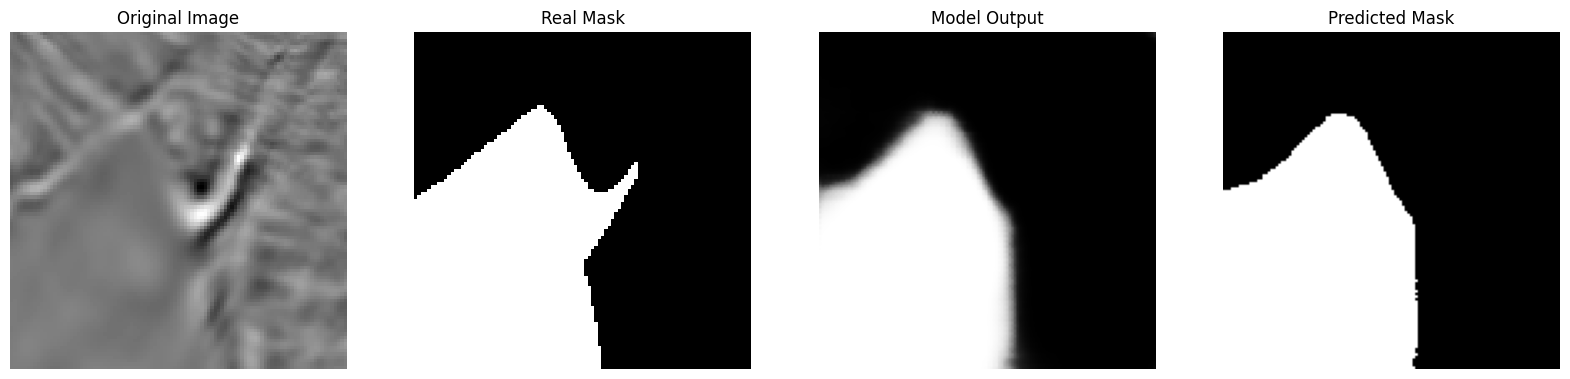

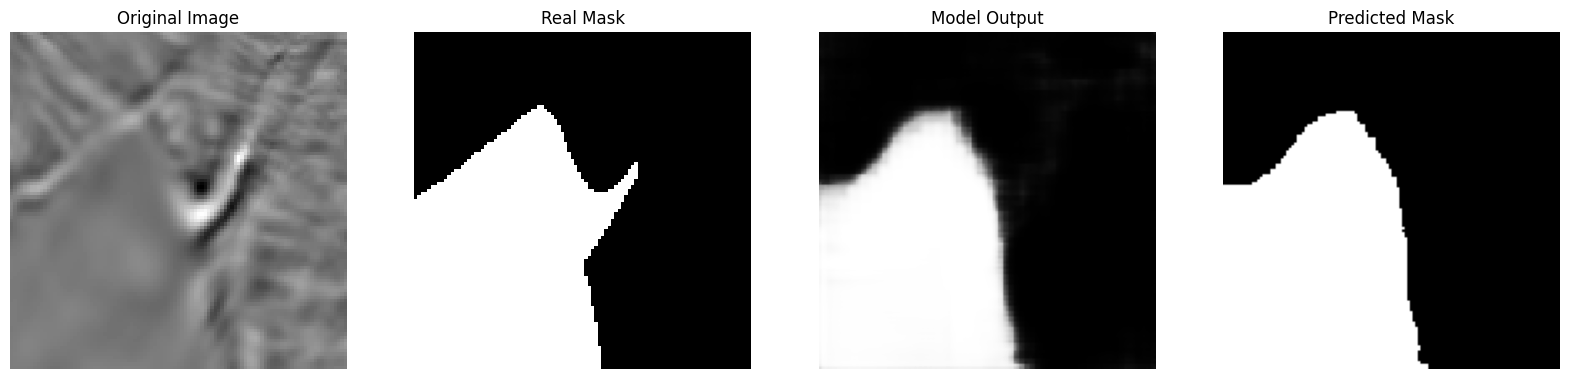

In [69]:
train_images_folder = os.path.join(train_folder, "images")
random_image = random.choice(os.listdir(train_images_folder))
print(random_image)
test_on_image(random_image, model, threshold=0.5)
test_on_image(random_image, model2, threshold=0.5)

The model without max pooling has a longer train, but the loss on the validation set is better.
However, when we test on images it we don't notice a lot of difference on the performance of the models


## Skip Connections

The skip connections help in the performance in the deep neural networks. 
It transfers details directly from the encoder to the decoder, details that could be lost during the encoding. It also helps to prevent the problem of the vanishing gradient problem, for a more effective training.

If we remove the skip connections, the decoder must rely on the final encoder output for its predictions. The network may struggle to recover fine-grained spatial details, leading to less accurate segmentation, especially for small objects. Also, training becomes more difficult, and the model may converge more slowly.

We can change the concatenation with other operations :
- Addition : It reduces the number of parameters (compared to concatenation) but might cause information loss if features are not aligned properly.
- Max or Min : It can introduce non-linearity and potentially capture different aspects, but llead to loss of informations.

Impact on results :
- Addition : Decrease of performance, cost less computationally.
- Max or Min : Can lead to a more significant drop in performance due to information loss, especially in tasks requiring precise spatial details.

## FCN and Auto-encoder

The auto-encoder architecture, which consists of an encoder and a decoder, is not strictly necessary for semantic segmentation tasks, but it offers several advantages:
- The encoder path learns to extract and compress relevant features from the input image, capturing high-level semantic information. The decoder path then reconstructs the segmentation map from these features, preserving spatial details.
- By down-sampling the input in the encoder and then up-sampling in the decoder, the auto-encoder architecture can efficiently use parameters, reducing computational complexity compared to maintaining full resolution throughout the network.
- The auto-encoder architecture can handle variability in input sizes.


Fully Convolutional Networks (FCNs)
A Fully Convolutional Network (FCN) can also be used for semantic segmentation. In an FCN, the spatial dimensions (width and height) of the input are maintained throughout the network using convolutional layers

- FCN maintain the spatial resolution of the input throughout the network, which can be beneficial for tasks requiring precise localization, but it comes at the cost of increased computational complexity and memory usage.
- FNC may struggle to capture high-level semantic features as effectively as auto-encoder architectures, especially if the network is not deep enough.
- FNC may require more parameters to achieve the same level of performance as auto-encoder architectures, due to the need to maintain high-resolution feature maps throughout the network.

## Threshold for inferance

In [ ]:
from sklearn.metrics import precision_score, recall_score

def test_threshold(model, threshold, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = (outputs > threshold).float()
            labels = (labels > 0.5).float() # Because the labels has been rescaled to a 128x128 image, there pixels that are not equal to 0 or 1
            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)

    return precision, recall

c:\Users\paull\miniforge3\envs\epsa_yolo\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paull\AppData\Local\Temp\ipykernel_7252\142542092.py:12: RuntimeWarning: invalid value encountered in scalar divide
  f1_list.append(2 * (precision * recall) / (precision + recall))


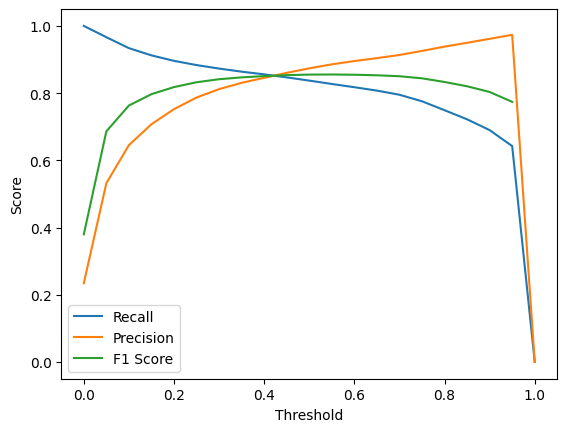

In [12]:
threshold_list = np.linspace(0, 1, 21)

recall_list = []
precision_list = []
f1_list = []

for threshold in threshold_list:
    # print(threshold)
    precision, recall = test_threshold(model, threshold, loader=validation_loader)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(2 * (precision * recall) / (precision + recall))

plt.plot(threshold_list, recall_list, label="Recall")
plt.plot(threshold_list, precision_list, label="Precision")
plt.plot(threshold_list, f1_list, label="F1 Score")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.show()

Here the precision and recall are defined for each pixel wether it has been well classified as salt or not.

The model has a better performance if we take a threshold of 0.4.